# How To Export a YOLOv5 2.0 Model Trained in Supervisely

After you have trained a model using Train YOLOv5 2.0 app, you can download the best checkpoint from Team Files and use your trained YOLOv5 w.0 model outside Supervisely Platform.

## 1. Download checkpoint from Team Files

1. Go to Team Files

![team_files_1](https://github.com/supervisely-ecosystem/yolov8/assets/91027877/d95a548b-e7dd-4e4a-a1fa-0c7a62ad62ac)

2. Download trained checkpoint

![team_files_3](https://github.com/supervisely-ecosystem/yolov5_2.0/assets/91027877/26ab0f11-f33f-46ef-aa38-8435459410e2)

Alternatively, you can download these files using Supervisely API:

In [ ]:
# Install supervisely SDK if not installed
!pip install supervisely

To download files via Supervisely API, you will need to define [server address](https://developer.supervisely.com/getting-started/basics-of-authentication#server_address-env), [api token](https://developer.supervisely.com/getting-started/basics-of-authentication#api_token-env) and [team id](https://developer.supervisely.com/getting-started/environment-variables#team_id):

In [ ]:
import supervisely as sly


server_address = "https://..."
api_token = "abcd0123456789..."
team_id = ...
path_to_weights_in_team_files = ...
download_dir = "./my_model"

api = sly.Api(server_address, api_token)
api.file.download(team_id, path_to_weights_in_team_files, f"{download_dir}/weights.pth")

## 2. Install necessary libraries

In [ ]:
!pip install torch==1.10.1+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install torchvision==0.11.2+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install ultralytics==8.0.112

You can also use [this Dockerfile](https://github.com/supervisely-ecosystem/yolov5_2.0/blob/master/docker/Dockerfile) to install necessary dependancies.

## 3. Build the model and load it on device

In [1]:
import torch
from ultralytics import YOLO

weights_path = "../my_model/weights.pt"
model = YOLO(weights_path)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

## 4. Inference & visualization of results

Let's see how input image looks like:

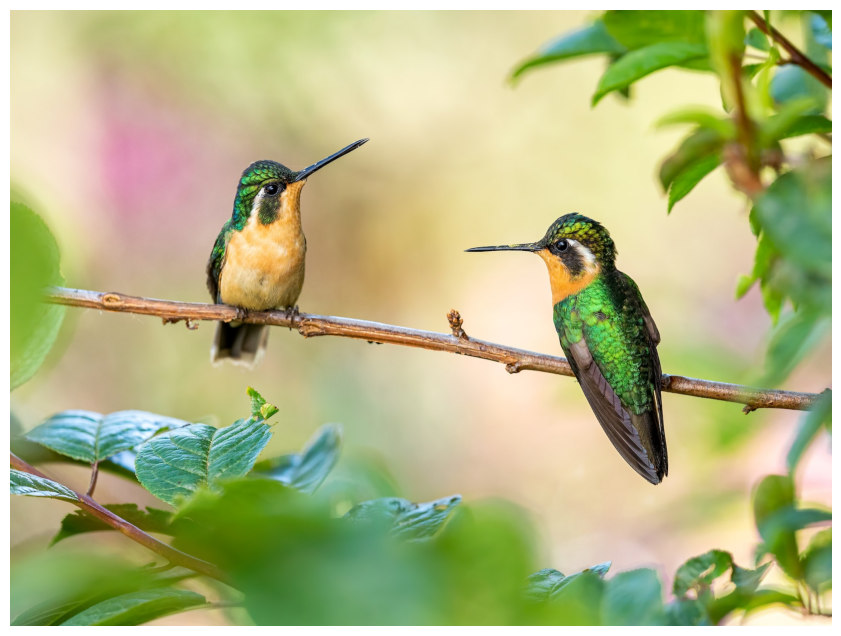

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# function for image visualization
def visualize_image(image_filepath):
    plt.figure(figsize=(12, 8))
    image = mpimg.imread(image_filepath)
    imageplot = plt.imshow(image)
    plt.axis("off")
    plt.show()

image_path = "image_0.jpg"
visualize_image(image_path)

In [3]:
predictions = model(image_path)
boxes_data = predictions[0].boxes.data
for box in boxes_data:
    left, top, right, bottom, confidence, cls_index = (
        int(box[0]),
        int(box[1]),
        int(box[2]),
        int(box[3]),
        float(box[4]),
        int(box[5]),
    )
    print(f"Class: {cls_index}, confidence: {confidence}, coordinates: {[top, left, bottom, right]}")


image 1/1 /Users/maxteselkin/Coding/supervisely_projects/yolov5_2.0/outside_supervisely/image_0.jpg: 480x640 2 birds, 171.0ms
Speed: 4.0ms preprocess, 171.0ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)


Class: 14, confidence: 0.9430556297302246, coordinates: [474, 1061, 1112, 1536]
Class: 14, confidence: 0.9223765730857849, coordinates: [296, 456, 832, 840]


In [ ]:
model.predict(image_path, save=True)

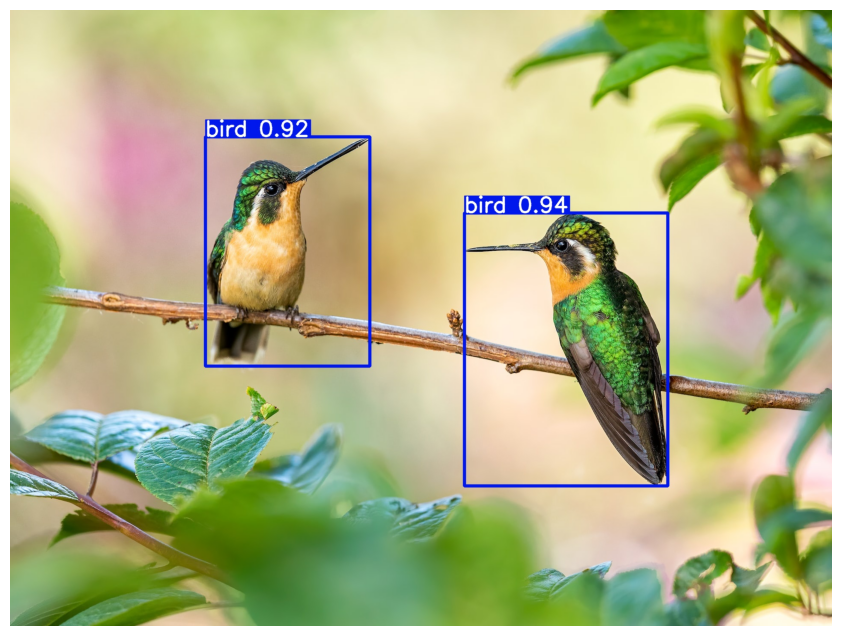

In [5]:
result_path = "runs/detect/predict/image_0.jpg"
visualize_image(result_path)